In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data_ID = pd.read_csv("C:/Users/sec/Desktop/DSL/data_ID.csv")
print(data_ID.head())
print(len(data_ID))
print(data_ID.columns)

   Unnamed: 0    ID  Counts   age  age_group  gender  car  reality  child_num  \
0           0  ID-0       5  38.0       30.0     0.0  0.0      0.0          0   
1           1  ID-1       9  31.0       30.0     0.0  0.0      1.0          1   
2           2  ID-2       6  52.0       50.0     1.0  1.0      1.0          0   
3           3  ID-3       2  41.0       40.0     0.0  0.0      1.0          0   
4           4  ID-4       1  41.0       40.0     0.0  1.0      1.0          0   

   income_total  ... work_phone phone email                occyp_type  \
0      202500.0  ...          0     0     0  Commercial_associate_etc   
1      247500.0  ...          0     0     1                  Laborers   
2      450000.0  ...          0     1     0                  Managers   
3      202500.0  ...          0     1     0               Sales staff   
4      157500.0  ...          0     0     0                  Managers   

   family_size  income_percentile  income_quantile  income_group5  credit_

In [3]:
data_ID.loc[data_ID['age'] <= 25, 'age_group'] = 20

data_ID.loc[(data_ID['age'] > 25) & 
         (data_ID['age'] <= 30), 'age_group'] = 25

data_ID.loc[(data_ID['age'] > 30) & 
         (data_ID['age'] <= 35), 'age_group'] = 30

data_ID.loc[(data_ID['age'] > 35) & 
         (data_ID['age'] <= 40), 'age_group'] = 35
          
data_ID.loc[(data_ID['age'] > 40) & 
         (data_ID['age'] <= 45), 'age_group'] = 40

data_ID.loc[(data_ID['age'] > 45) & 
         (data_ID['age'] <= 50), 'age_group'] = 45

data_ID.loc[(data_ID['age'] > 50) & 
         (data_ID['age'] <= 55), 'age_group'] = 50

data_ID.loc[(data_ID['age'] > 55) & 
         (data_ID['age'] <= 60), 'age_group'] = 55
    
data_ID.loc[data_ID['age'] > 60, 'age_group'] = 60
    
print(data_ID['age_group'].describe())
print(data_ID['age_group'].unique())

count    8759.000000
mean       40.666172
std        11.570242
min        20.000000
25%        30.000000
50%        40.000000
75%        50.000000
max        60.000000
Name: age_group, dtype: float64
[35. 30. 50. 40. 45. 25. 60. 20. 55.]


# Counts, child_num, income_total은 아웃라이어 제거해야됨

## Counts는 10 이상은 제거

In [4]:
data_ID['Counts'].value_counts()

1     3249
2     1680
3     1123
4      831
5      593
6      450
7      290
8      161
9      136
10      86
11      59
12      37
13      19
14      15
15      10
16       7
20       5
18       2
24       2
35       1
21       1
17       1
19       1
Name: Counts, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1846e712400>,
 'caps': [<matplotlib.lines.Line2D at 0x1846e712a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1846e712130>],
 'medians': [<matplotlib.lines.Line2D at 0x1846e712f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1846e725250>],
 'means': []}

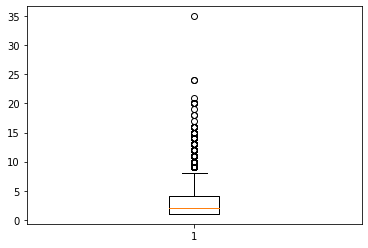

In [5]:
plt.boxplot(data_ID['Counts'])

In [6]:
data_ID_adj = data_ID[data_ID['Counts']<=9]

In [7]:
len(data_ID_adj)

8513

## income_total은 4000000 초과는 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x1846e80a4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1846e80aa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1846e80a1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1846e816040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1846e816310>],
 'means': []}

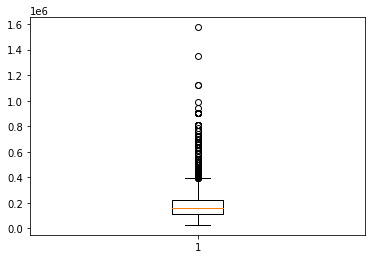

In [8]:
plt.boxplot(data_ID_adj['income_total'])

In [9]:
data_ID_adj2 = data_ID_adj[data_ID_adj['income_total'] <= 400000]

In [10]:
len(data_ID_adj2)

8228

## child_num은 일단 놔둠

In [11]:
data_ID_f = data_ID_adj2[:]
print(data_ID_f.head())

   Unnamed: 0    ID  Counts   age  age_group  gender  car  reality  child_num  \
0           0  ID-0       5  38.0       35.0     0.0  0.0      0.0          0   
1           1  ID-1       9  31.0       30.0     0.0  0.0      1.0          1   
3           3  ID-3       2  41.0       40.0     0.0  0.0      1.0          0   
4           4  ID-4       1  41.0       40.0     0.0  1.0      1.0          0   
5           5  ID-5       1  37.0       35.0     0.0  0.0      1.0          2   

   income_total  ... work_phone phone email                occyp_type  \
0      202500.0  ...          0     0     0  Commercial_associate_etc   
1      247500.0  ...          0     0     1                  Laborers   
3      202500.0  ...          0     1     0               Sales staff   
4      157500.0  ...          0     0     0                  Managers   
5      270000.0  ...          0     0     1     High skill tech staff   

   family_size  income_percentile  income_quantile  income_group5  credit_

## 소득 5개 분위로 쪼갬: 제일 분석 결과 깔끔함

In [12]:
#Income group5

data_ID_f.loc[data_ID_f['income_total'] <= data_ID_f['income_total'].quantile(0.20), 'income_group5'] = 1

data_ID_f.loc[(data_ID_f['income_total'] > data_ID_f['income_total'].quantile(0.20)) & 
         (data_ID_f['income_total'] <= data_ID_f['income_total'].quantile(0.40)), 'income_group5'] = 2

data_ID_f.loc[(data_ID_f['income_total'] > data_ID_f['income_total'].quantile(0.40)) & 
         (data_ID_f['income_total'] <= data_ID_f['income_total'].quantile(0.60)), 'income_group5'] = 3

data_ID_f.loc[(data_ID_f['income_total'] > data_ID_f['income_total'].quantile(0.60)) & 
         (data_ID_f['income_total'] <= data_ID_f['income_total'].quantile(0.80)), 'income_group5'] = 4

data_ID_f.loc[data_ID_f['income_total'] > data_ID_f['income_total'].quantile(0.80), 'income_group5'] = 5

print(data_ID_f['income_group5'].describe())

count    8228.000000
mean        2.794847
std         1.431542
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: income_group5, dtype: float64


In [42]:
data_ID_f.to_csv('data_ID_out.csv')

# 주택과 자동차 보유

## 소득분위별 신용수요: 저번주와 동일한 결과

### 소득분위별 주택보유현황: 특별한 경향 없음

Text(0.5, 1.0, 'Probability of owning house VS Income Percentile')

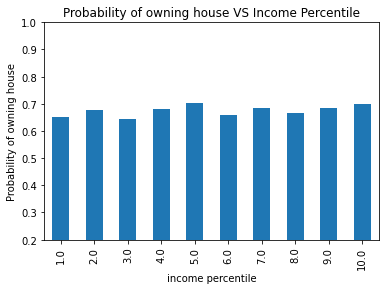

In [14]:
data_ID_f.groupby('income_percentile')['reality'].mean().plot(kind = 'bar')
plt.ylim(0.2, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning house')
plt.title('Probability of owning house VS Income Percentile')

(1.2, 1.8)

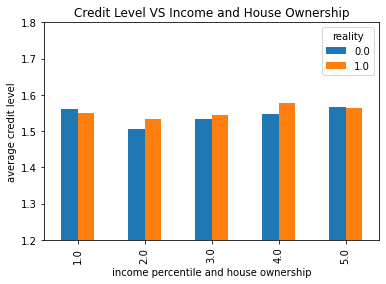

In [15]:
data_ID_f.groupby(['income_group5', 'reality'])['credit_avg'].mean().unstack().plot(kind='bar')
plt.xlabel('income percentile and house ownership')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and House Ownership')
plt.ylim(1.2,1.8)

Text(0.5, 1.0, '# of Cards VS Income and House Ownership')

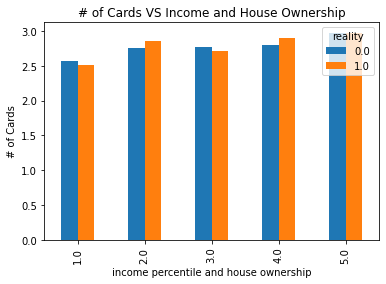

In [16]:
data_ID_f.groupby(['income_group5', 'reality'])['Counts'].mean().unstack().plot(kind='bar')
plt.xlabel('income percentile and house ownership')
plt.ylabel('# of Cards')
plt.title('# of Cards VS Income and House Ownership')

(2.0, 4.0)

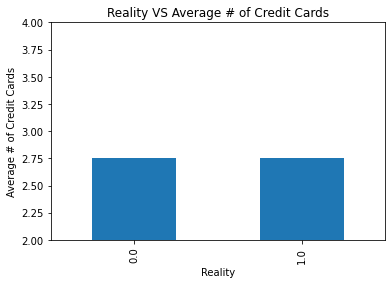

In [17]:
data_ID_f.groupby('reality')['Counts'].mean().plot(kind = 'bar')
plt.xlabel('Reality')
plt.ylabel('Average # of Credit Cards')
plt.title('Reality VS Average # of Credit Cards')
plt.ylim(2, 4)

### 소결
(1) 소득분위와 부동산 소유 현황 간의 패턴이 없음.
-> 해석: 부동산은 필수재이므로 소득이 낮아도 부동산을 필요로 함 
(2) 신용카드 발급회수와 부동산 소유 현황 간의 패턴이 없음.
-> 해석: 부동산 소유 자체는 과소비 또는 신용과잉 행태와 무관함

### 소득분위별 자동차 소유 현황: 소득분위가 낮으면 자동차를 덜 소유함

Text(0.5, 1.0, 'Probability of owning car VS Income Percentile')

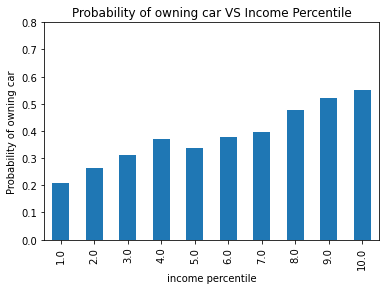

In [18]:
data_ID_f.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.8)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Probability of owning car VS Income Percentile')

(1.2, 1.8)

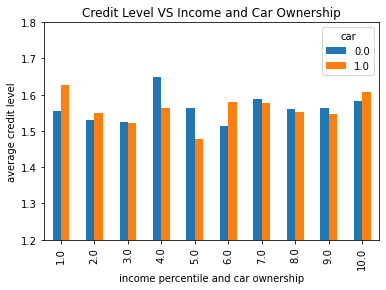

In [19]:
data_ID_f.groupby(['income_percentile', 'car'])['credit_avg'].mean().unstack().plot(kind='bar')
plt.xlabel('income percentile and car ownership')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and Car Ownership')
plt.ylim(1.2,1.8)

Text(0.5, 1.0, 'Credit Level VS Income and Car Ownership')

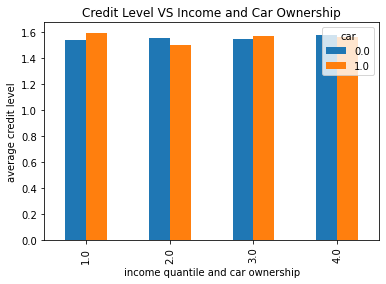

In [20]:
data_ID_f.groupby(['income_quantile', 'car'])['credit_avg'].mean().unstack().plot(kind='bar')
plt.xlabel('income quantile and car ownership')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and Car Ownership')
# plt.ylim(1.2,1.8)

(1.2, 1.8)

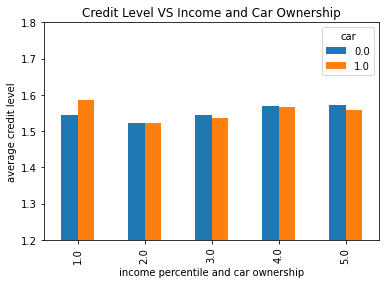

In [21]:
data_ID_f.groupby(['income_group5', 'car'])['credit_avg'].mean().unstack().plot(kind='bar')
plt.xlabel('income percentile and car ownership')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and Car Ownership')
plt.ylim(1.2,1.8)

(2.0, 3.8)

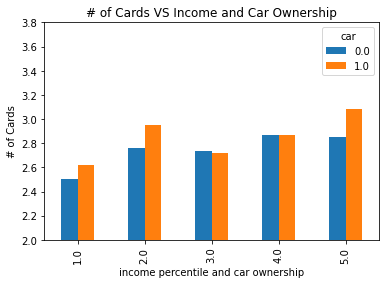

In [22]:
data_ID_f.groupby(['income_group5', 'car'])['Counts'].mean().unstack().plot(kind='bar')
plt.xlabel('income percentile and car ownership')
plt.ylabel('# of Cards')
plt.title('# of Cards VS Income and Car Ownership')
plt.ylim(2,3.8)

### 소결
(1) 소득분위가 낮을수록 자동차를 덜 보유함
-> 자동차는 필수재 성격이 낮으므로, 소득수준이 낮으면 자동차를 덜 보유하는 것. 소득이 줄면 불필요한 신용 수요도 줄어든다는 결론
(2) 신용카드 연체 정도와 자동차 보유는 상관이 없음
-> 자동차를 보유하는 사람들은 대개 소득이 그만큼 높기 때문에, 자동차를 보유한다고 신용카드 연체가 늘어나지 않음
(3) 자동차를 보유한 사람들은 신용카드 발급회수가 더 많음
-> 자동차를 보유하는 사람들은 신용행태가 더 활발하므로 신용카드를 더 많이 발급
(4) 저번주에는 하위 소득분위에서 자동차 보유 시 연체정도가 높아지는 경향이 있었는데, 데이터 전처리 후 그런 경향이 사라짐??

## 신용카드 발급회수와 신용카드 연체

### 신용카드 발급회수의 히스토그램: 주로 1~2개

Text(0.5, 1.0, '<Histogram> # of Credit Cards')

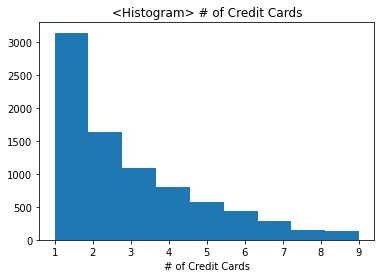

In [23]:
plt.hist(data_ID_f['Counts'], bins = 9)
plt.xlabel('# of Credit Cards')
plt.title('<Histogram> # of Credit Cards')

### 신용카드 발급회수와 신용카드의 평균 연체율

Text(0.5, 1.0, 'Average Credit level VS # of Credit Cards')

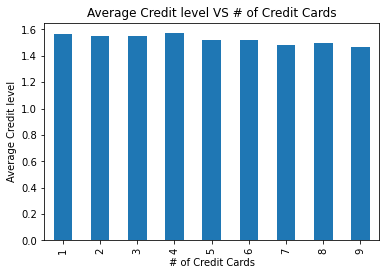

In [24]:
data_ID_f.groupby('Counts')['credit_avg'].mean().plot(kind = 'bar')
plt.xlabel('# of Credit Cards')
plt.ylabel('Average Credit level')
plt.title('Average Credit level VS # of Credit Cards')

Text(0.5, 1.0, '# of Credit Cards VS Income')

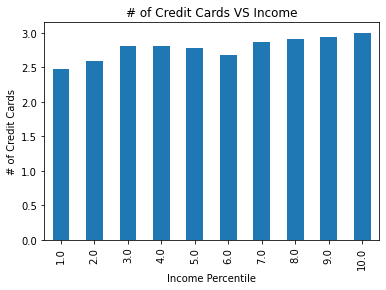

In [25]:
data_ID_f.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylabel('# of Credit Cards')
plt.xlabel('Income Percentile')
plt.title('# of Credit Cards VS Income')

### 소결
(1) 신용카드 발급회수와 신용카드 평균 연체 정도는 무관함 혹은, 발급회수가 늘어날 수록 평균 연체 정도는 줄어듦
-> 신용카드를 많이 발급하는 사람들은 그만큼 소득이 받쳐주기 때문에 가능한 것.
-> 결국 소득이 줄어들면 그에 비례해서 신용수요가 줄어들기 때문에 소득 자체가 신용카드 연체와 무관하다는 기존 결론과 일관됨
(2) 소득이 높아지면 신용카드 발급회수가 늘어남.
-> (1)의 결론을 뒷받침하는 근거
(3) 아웃라이어 처리: 신용카드를 10개 이상 발급하는 경우는 뭔가 문제가 있음. 관측치 수도 많지 않으므로 제거도 고려했으면.

# 자녀의 수: 특별한 경향 없음

In [26]:
data_ID_f['child_num'].value_counts()

0     5794
1     1588
2      718
3      107
4       15
5        3
19       1
14       1
7        1
Name: child_num, dtype: int64

(2.0, 4.0)

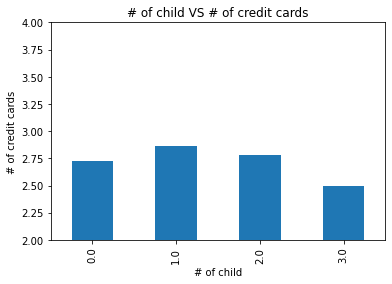

In [27]:
data_ID_f.groupby('child_num_group')['Counts'].mean().plot(kind = 'bar')
plt.xlabel('# of child')
plt.ylabel('# of credit cards')
plt.title('# of child VS # of credit cards')
plt.ylim(2, 4)

(1.2, 1.8)

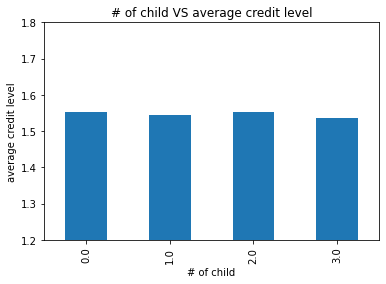

In [28]:
data_ID_f.groupby('child_num_group')['credit_avg'].mean().plot(kind = 'bar')
plt.xlabel('# of child')
plt.ylabel('average credit level')
plt.title('# of child VS average credit level')
plt.ylim(1.2, 1.8)

(1.2, 1.9)

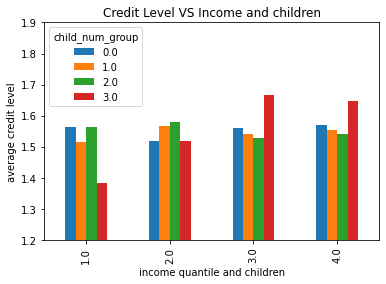

In [29]:
data_ID_f.groupby(['income_quantile', 'child_num_group'])['credit_avg'].mean().unstack().plot(kind='bar', legend='None')
plt.xlabel('income quantile and children')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and children')
# plt.legend('',frameon=False)
plt.ylim(1.2, 1.9)

(1.2, 1.9)

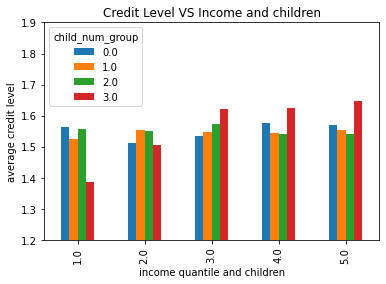

In [30]:
data_ID_f.groupby(['income_group5', 'child_num_group'])['credit_avg'].mean().unstack().plot(kind='bar', legend='None')
plt.xlabel('income quantile and children')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and children')
# plt.legend('',frameon=False)
plt.ylim(1.2, 1.9)

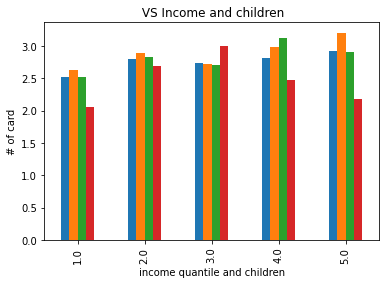

In [31]:
data_ID_f.groupby(['income_group5', 'child_num_group'])['Counts'].mean().unstack().plot(kind='bar', legend='None')
plt.xlabel('income quantile and children')
plt.ylabel('# of card')
plt.title(' VS Income and children')
plt.legend('',frameon=False)

## 소결
(1) 자녀의 수와 신용카드 연체에는 상관이 없음
(2) 자녀의 수와 신용카드 발급회수에는 상관이 없음

# 저소득분위이면서 자동차를 가진 사람들의 특징

## data_b는 저소득분위이면서 자동차 보유, data_a는 저소득분위이면서 자동차는 없음

In [32]:
data_b = data_ID_f[(data_ID_f['car']==1) & (data_ID_f['income_group5']<3)]
data_a = data_ID_f[data_ID_f['income_group5']<3]

In [33]:
print(len(data_b), len(data_a))

945 3582


## 과소비집단은 젊은 층이 더 많음

(0.0, 0.2)

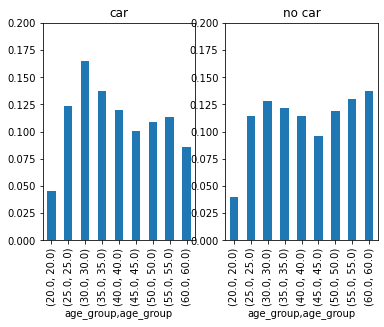

In [34]:
plt.subplot(1,2,1)
(data_b.groupby('age_group')['age_group'].value_counts()/len(data_b)).plot(kind='bar')
plt.title('car')
plt.ylim(0,0.2)

plt.subplot(1,2,2)
(data_a.groupby('age_group')['age_group'].value_counts()/len(data_a)).plot(kind='bar')
plt.title('no car')
plt.ylim(0,0.2)

## 과소비집단은 남자가 더 많음

Text(0.5, 1.0, 'no car')

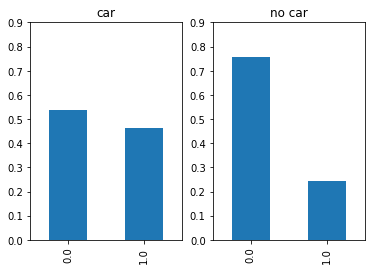

In [35]:
plt.subplot(1,2,1)
(data_b['gender'].value_counts()/len(data_b)).plot(kind='bar')
plt.ylim(0,0.9)
plt.title('car')
plt.subplot(1,2,2)
(data_a['gender'].value_counts()/len(data_a)).plot(kind='bar')
plt.ylim(0,0.9)
plt.title('no car')

### 남자들이 차를 더 좋아하면, 소득이 줄어들어도 남성들은 차를 보유하려고 할 것이다

<AxesSubplot:xlabel='income_group5'>

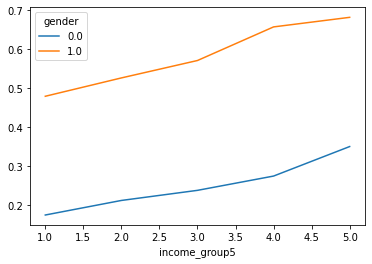

In [36]:
data_ID_f.groupby(['income_group5', 'gender'])['car'].mean().unstack().plot(kind='line')

### 전 연령대의 경우 그런 현상 없었으나, 35세 미만의 경우 그런 현상이 발생함

In [37]:
data_young = data_ID_f[data_ID_f['age_group']<=30]

<AxesSubplot:xlabel='income_group5'>

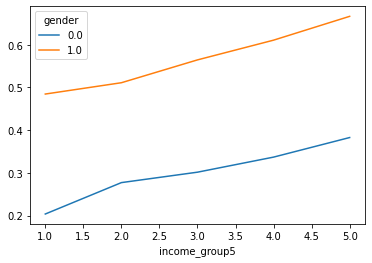

In [38]:
data_young.groupby(['income_group5', 'gender'])['car'].mean().unstack().plot(kind='line')

## 과소비집단은 근로자(working)가 더 많음

Text(0.5, 1.0, 'no car')

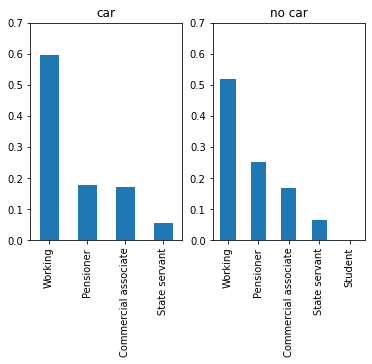

In [39]:
plt.subplot(1,2,1)
(data_b['income_type'].value_counts()/len(data_b)).plot(kind='bar')
plt.ylim(0,0.7)
plt.title('car')
plt.subplot(1,2,2)
(data_a['income_type'].value_counts()/len(data_a)).plot(kind='bar')
plt.ylim(0,0.7)
plt.title('no car')

## 과소비집단과 교육수준 간에는 상관 x

Text(0.5, 1.0, 'no car')

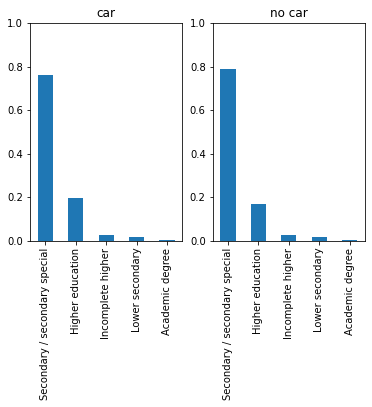

In [40]:
plt.subplot(1,2,1)
(data_b['edu_type'].value_counts()/len(data_b)).plot(kind='bar')
plt.ylim(0, 1)
plt.title('car')
plt.subplot(1,2,2)
(data_a['edu_type'].value_counts()/len(data_a)).plot(kind='bar')
plt.ylim(0, 1)
plt.title('no car')

## 과소비집단은 신용카드 조금 더 많이 발급

2.765079365079365 2.637353433835846


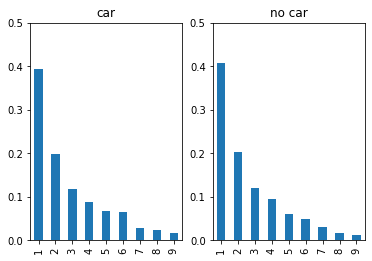

In [41]:
plt.subplot(1,2,1)
(data_b['Counts'].value_counts()/len(data_b)).plot(kind='bar')
plt.ylim(0, 0.5)
plt.title('car')
plt.subplot(1,2,2)
(data_a['Counts'].value_counts()/len(data_a)).plot(kind='bar')
plt.ylim(0, 0.5)
plt.title('no car')

print(data_b['Counts'].mean(), data_a['Counts'].mean())